In [1]:
%matplotlib inline
%pylab inline

import menpo.io as mio
from menpo.feature import fast_dsift, dsift, sparse_hog
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Create data

In [2]:
for image in mio.import_images('/vol/atlas/databases/lfpw/trainset/', 
                           verbose=True, max_images=1):
    image = image.crop_to_landmarks_proportion(0.5)
    image = image.rescale_landmarks_to_diagonal_range(200)
    labeller(image, 'PTS', ibug_face_66)

Importing assets: [==========] 100% (1/1) - done.                               


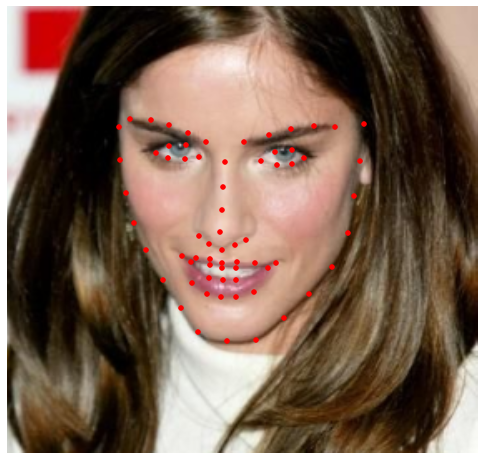

In [3]:
visualize_images(image)

## Response map computation

In [18]:
import numpy as np
from numpy.fft import ifft2, fft2, ifftshift
from pyfftw.interfaces.numpy_fft import fft2 as fft2w, ifft2 as ifft2w

In [14]:
x = np.random.randn(8, 24, 24).astype(np.float32)
f = np.random.randn(66, 8, 24, 24).astype(np.complex64)

In [15]:
%%timeit

r = np.real(ifft2(fft2(x) * f))

100 loops, best of 3: 19.1 ms per loop


In [7]:
%%timeit

r = np.real(ifft2w(fft2w(x) * f))

RuntimeError: The data has an uncaught error that led to the planner returning NULL. This is a bug.

In [16]:
i = np.random.randn(8, 128, 128).astype(np.float32)
f = np.random.randn(66, 8, 128, 128).astype(np.complex64)

In [ ]:
%%timeit

ifft2(np.sum(fft2(i) * f, axis=1))

In [ ]:
%%timeit

for c in i:
    convolve2d(c, f[0][0], mode='same')

In [45]:
%timeit r1 = np.real(ifftshift(ifft2(np.sum(fft2(i) * f, axis=1)), axes=(-2, -1)))

10 loops, best of 3: 167 ms per loop


In [46]:
%timeit r2 = np.real(np.sum(ifftshift(ifft2(fft2(i) * f), axes=(-2, -1)), axis=1))

1 loops, best of 3: 778 ms per loop


In [44]:
np.allclose(r1, r2)

True